<a href="https://colab.research.google.com/github/etancher/twitteralgo/blob/main/Copy_of_Image_Crop_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [3]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [4]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

     |████████████████████████████████| 1.1 MB 9.7 MB/s 
     |████████████████████████████████| 3.7 MB 55.7 MB/s 
     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 1.8 MB 48.3 MB/s 
     |████████████████████████████████| 357 kB 34.7 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=979b84391915d10f0cc7460226727ae691a3d5e508d15a5facb53a64f1b29888
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=a7755d32a6d6db1c3450f68b3eedc17952343d51ea822437a8a204107404547a
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=646897923a34069d026bdd9409e65f83d33903342ad5412d58284c0

True

In [6]:
img_path = next(data_dir.glob("./*.jpg"))
img_path

PosixPath('image-crop-analysis/data/11.jpg')

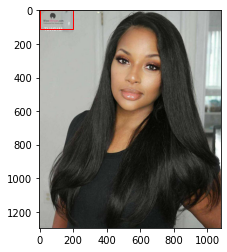

In [ ]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [ ]:
str(img_path.absolute())

'/content/image-crop-analysis/data/11.jpg'

In [ ]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"image-crop-analysis/bin/linux/candidate_crops image-crop-analysis/bin/fastgaze.vxm '/content/image-crop-analysis/data/11.jpg' show_all_points"

In [ ]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'614 355', b'0 53 1080 605', b'0 0 1080 1080', b'0 0 1080 1231', b'290 0 648 1296', b'0 0 1080 1296', b'32.3596 32.3596 0.884714', b'97.0787 32.3596 1.18006', b'161.798 32.3596 0.856318', b'226.517 32.3596 0.355482', b'291.236 32.3596 -0.0283924', b'355.955 32.3596 0.0390619', b'420.674 32.3596 0.116161', b'485.393 32.3596 0.32334', b'550.112 32.3596 0.352908', b'614.831 32.3596 0.493966', b'679.551 32.3596 0.50097', b'744.27 32.3596 0.415086', b'808.989 32.3596 0.253437', b'873.708 32.3596 0.031269', b'938.427 32.3596 -0.0244966', b'1003.15 32.3596 -0.000659606', b'1067.87 32.3596 0.0636888', b'32.3596 97.0787 1.26893', b'97.0787 97.0787 1.77241', b'161.798 97.0787 1.33822', b'226.517 97.0787 0.493765', b'291.236 97.0787 -0.0799783', b'355.955 97.0787 0.104978', b'420.674 97.0787 0.37709', b'485.393 97.0787 0.827072', b'550.112 97.0787 0.946698', b'614.831 97.0787 1.29882', b'679.551 97.0787 1.31049', b'744.27 97.0787 1.06736', b'808.989 97.0787 0.609583', b'873.708 97.0787 0.083130

In [ ]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
614 355
0 53 1080 605
0 0 1080 1080
0 0 1080 1231
290 0 648 1296
0 0 1080 1296
32.3596 32.3596 0.884714
97.0787 32.3596 1.18006
161.798 32.3596 0.856318
226.517 32.3596 0.355482


In [ ]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [ ]:
parse_output(output).keys()

dict_keys(['salient_point', 'crops', 'all_salient_points'])

In [ ]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [ ]:
plt.matplotlib.__version__

'3.2.2'

In [ ]:
list(data_dir.glob("./*.jpg"))

[PosixPath('image-crop-analysis/data/11.jpg'),
 PosixPath('image-crop-analysis/data/13.jpg'),
 PosixPath('image-crop-analysis/data/8.jpg'),
 PosixPath('image-crop-analysis/data/15.jpg'),
 PosixPath('image-crop-analysis/data/10.jpg'),
 PosixPath('image-crop-analysis/data/9.jpg')]

image-crop-analysis/data/11.jpg
None 1080 1296
image-crop-analysis/data/13.jpg
None 500 674
image-crop-analysis/data/8.jpg
None 213 237
image-crop-analysis/data/15.jpg
None 259 195
image-crop-analysis/data/10.jpg
None 225 225
image-crop-analysis/data/9.jpg
None 300 168


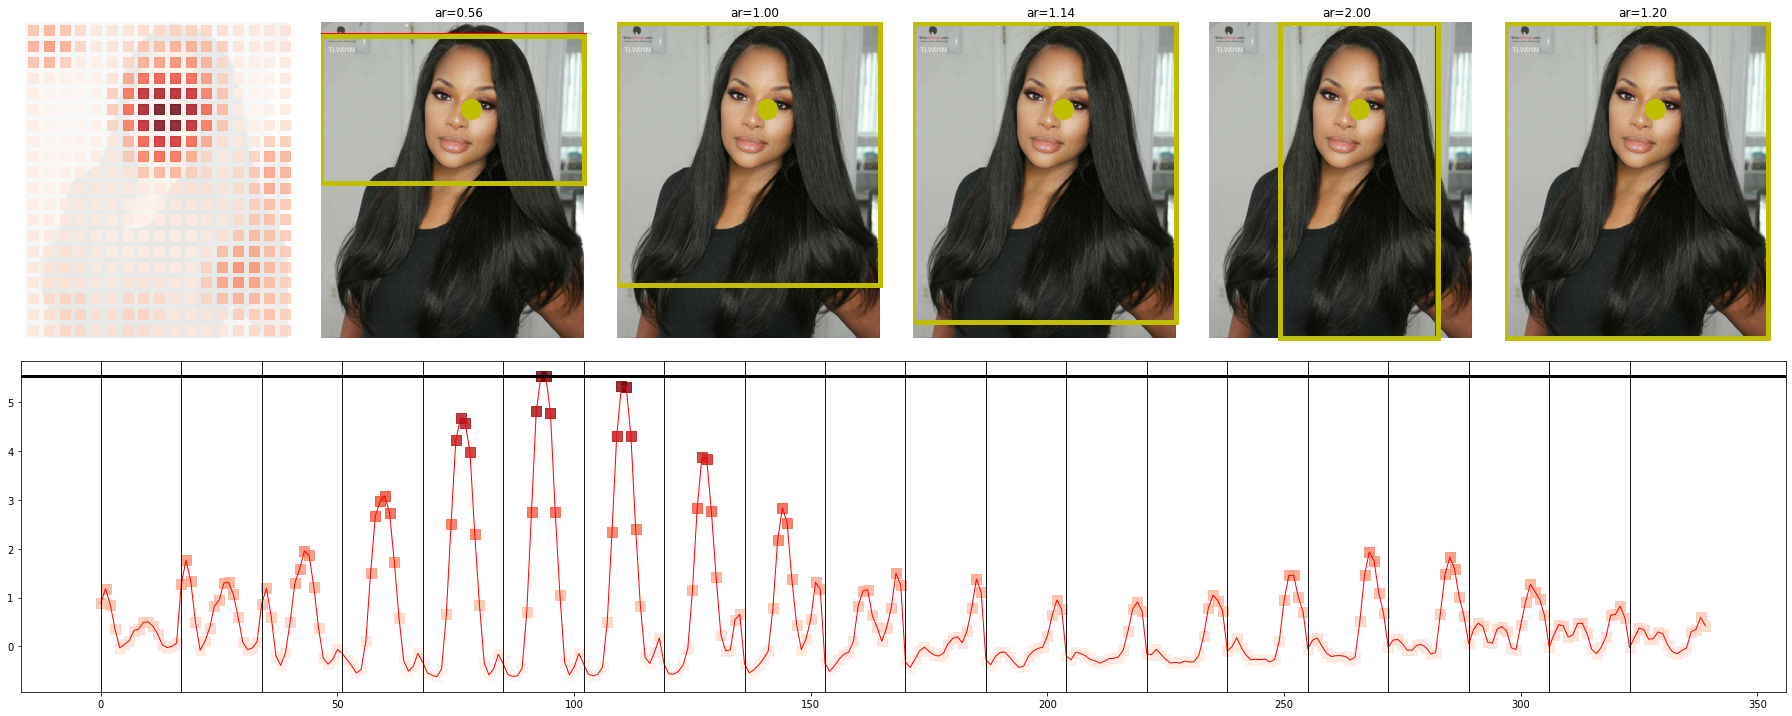

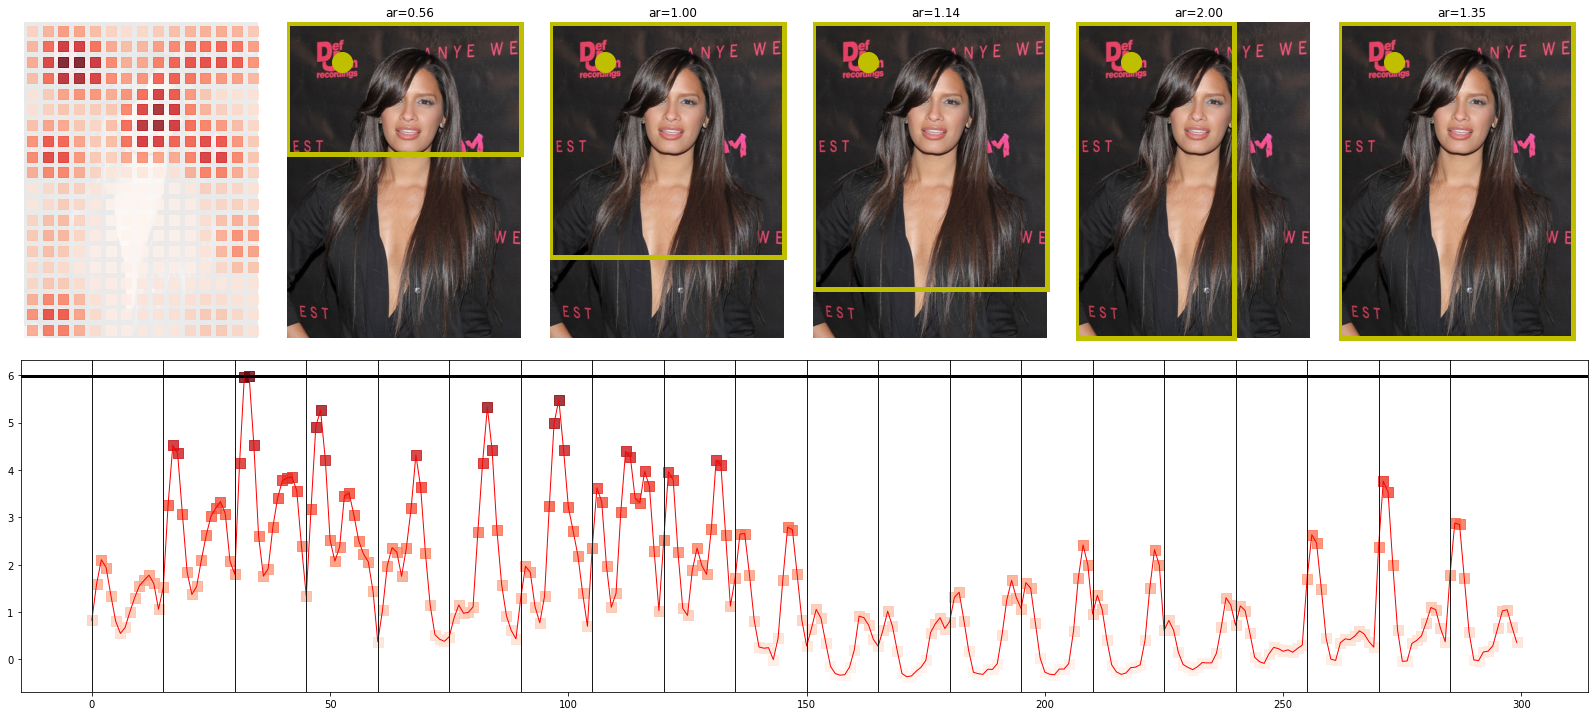

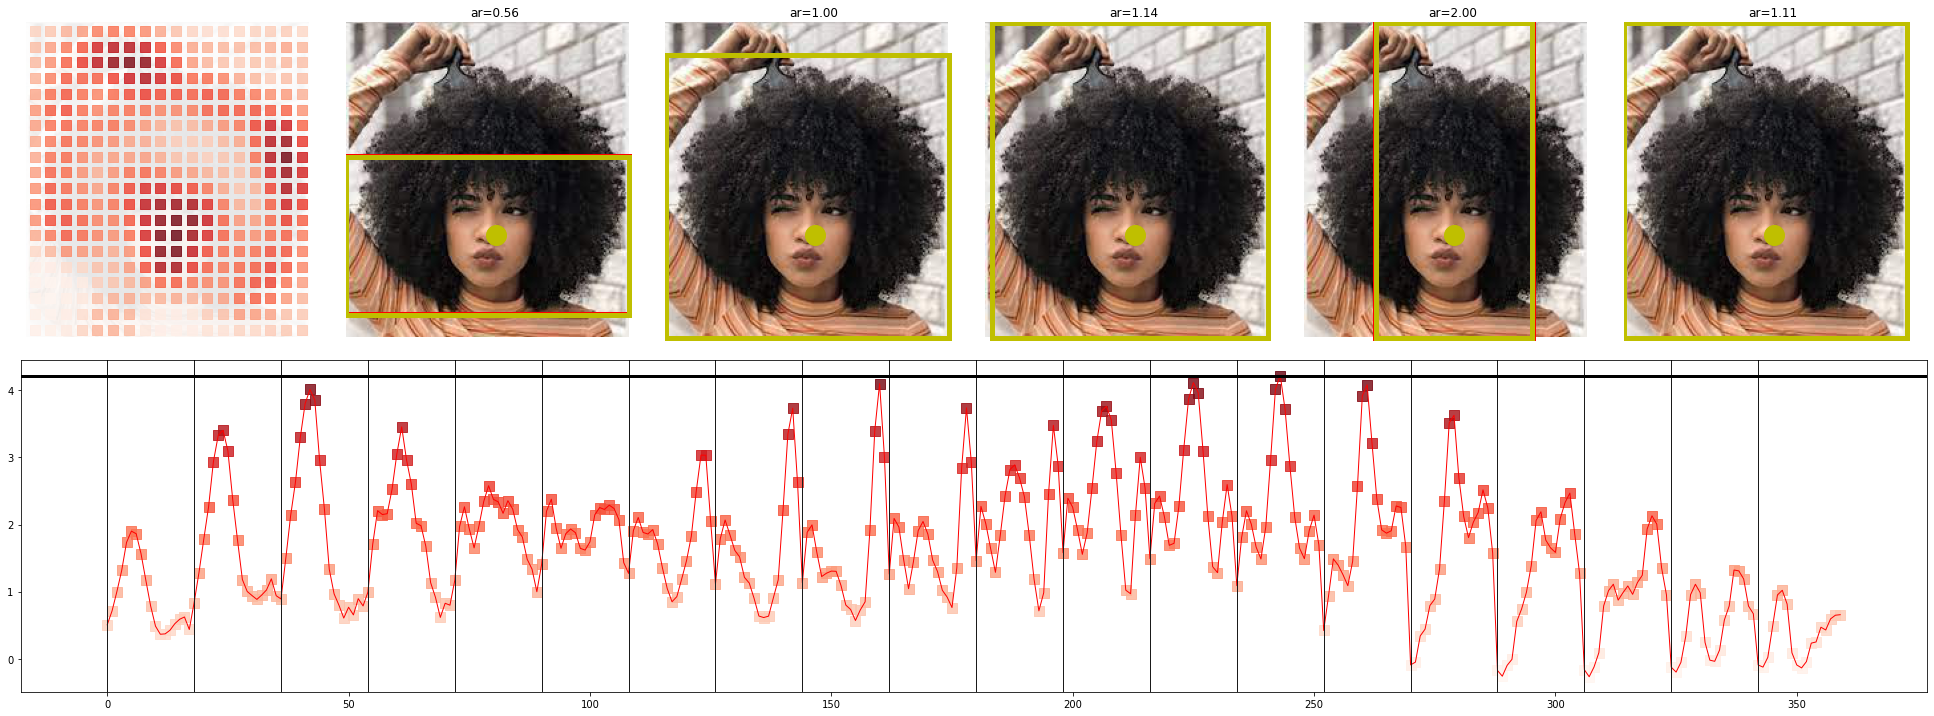

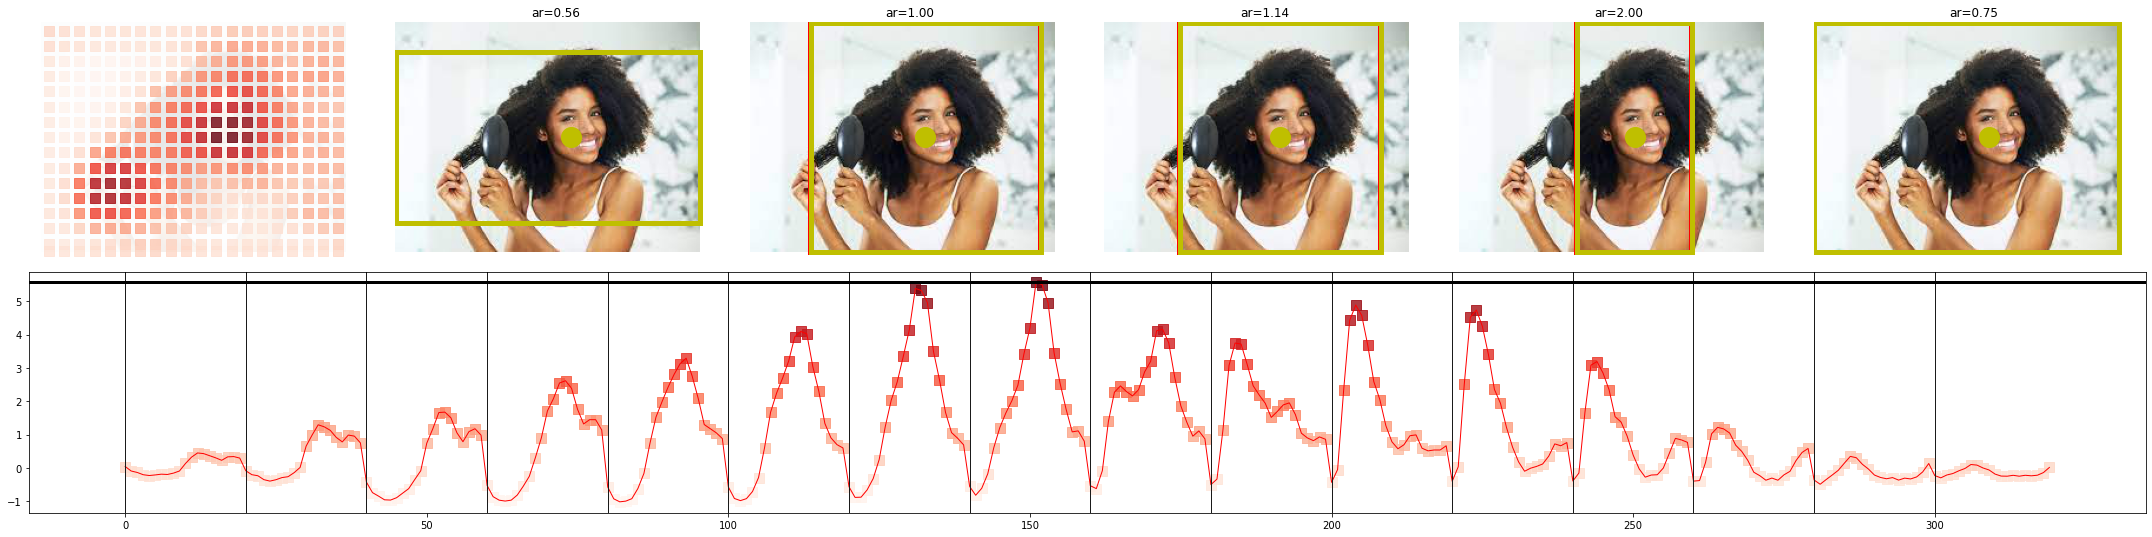

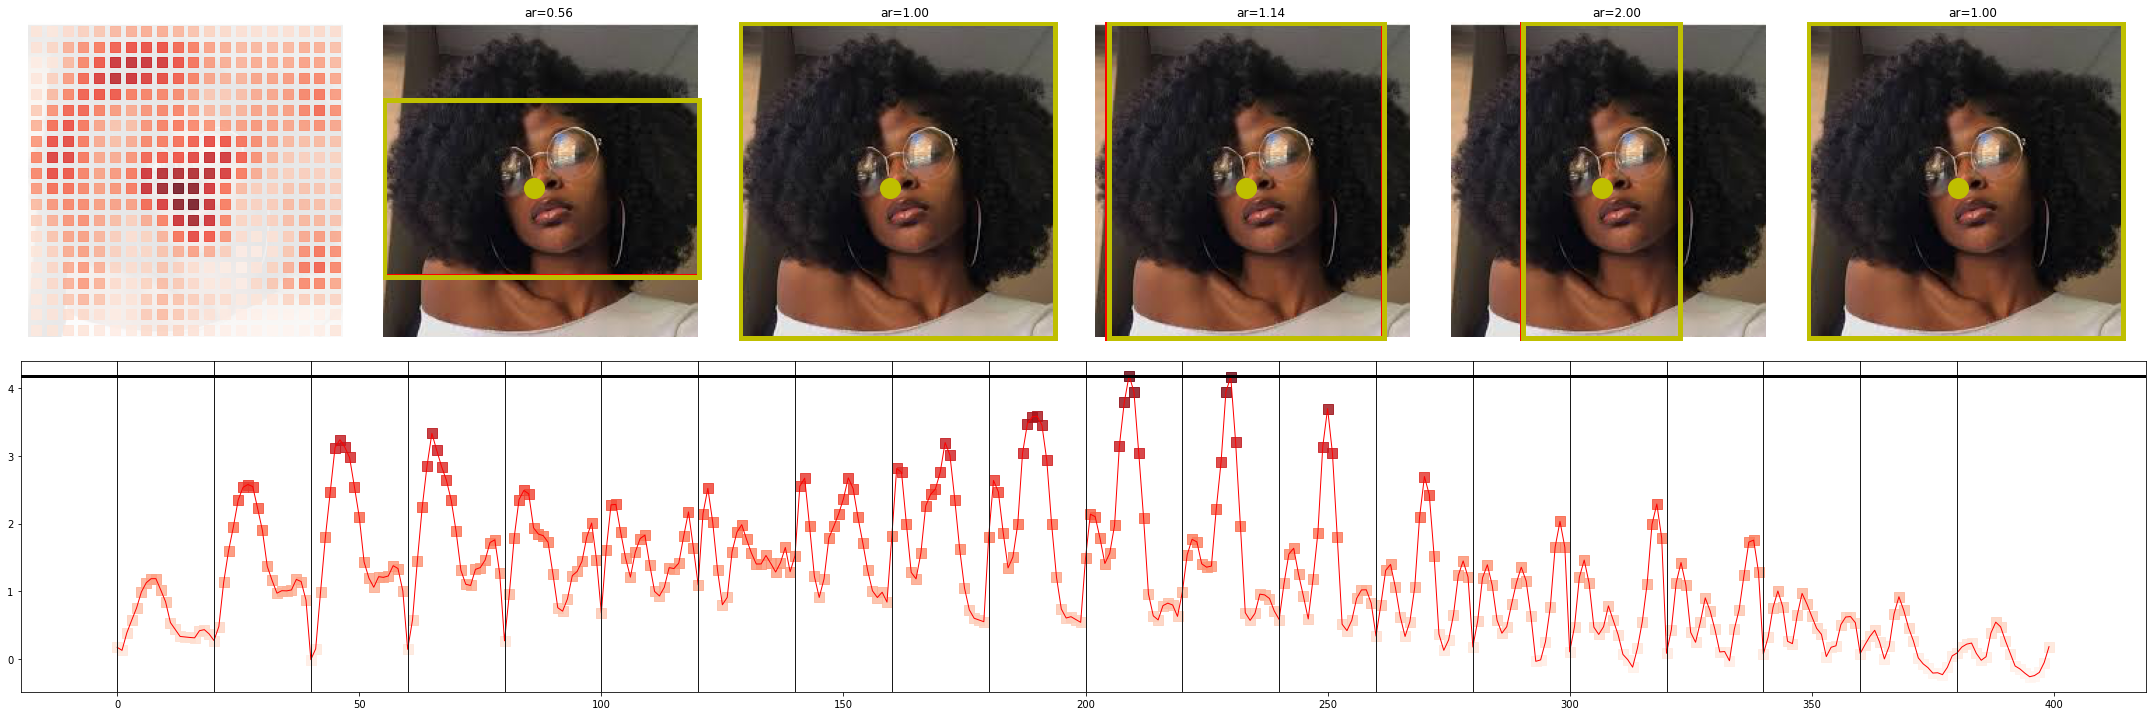

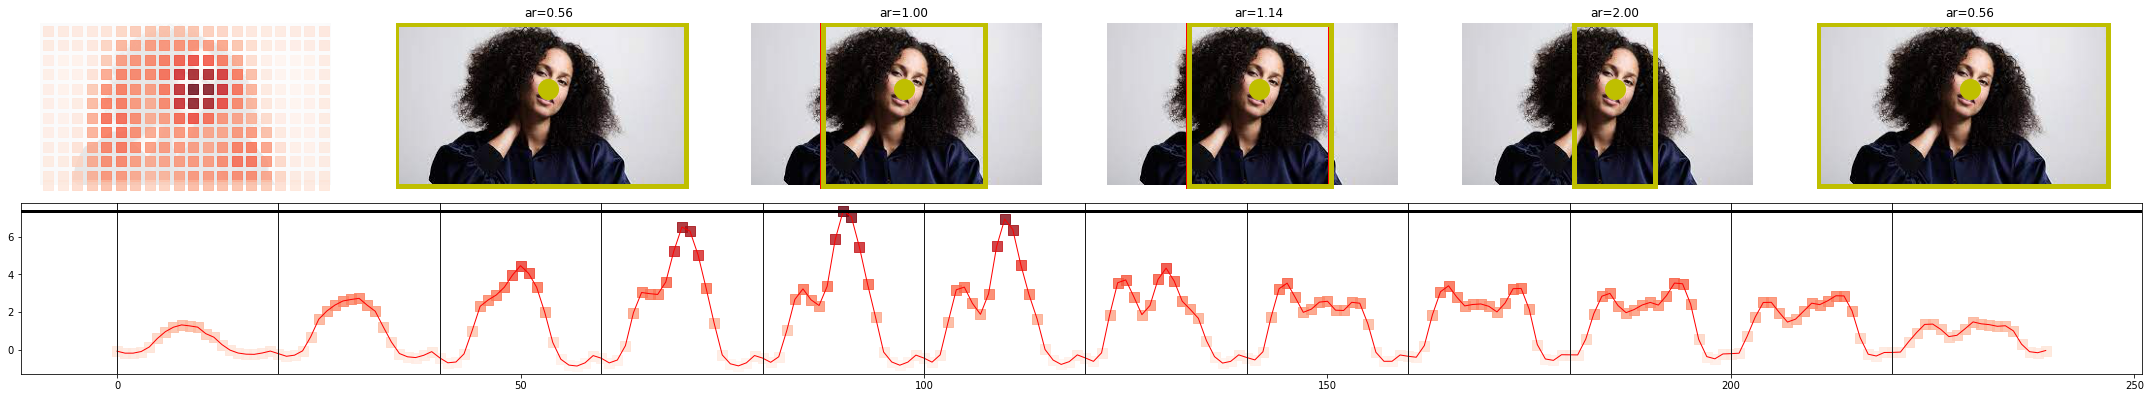

In [ ]:
for img_path in data_dir.glob("*.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

image-crop-analysis/data/11.jpg
None 1080 1296
image-crop-analysis/data/13.jpg
None 500 674
image-crop-analysis/data/8.jpg
None 213 237
image-crop-analysis/data/15.jpg
None 259 195
image-crop-analysis/data/10.jpg
None 225 225
image-crop-analysis/data/9.jpg
None 300 168


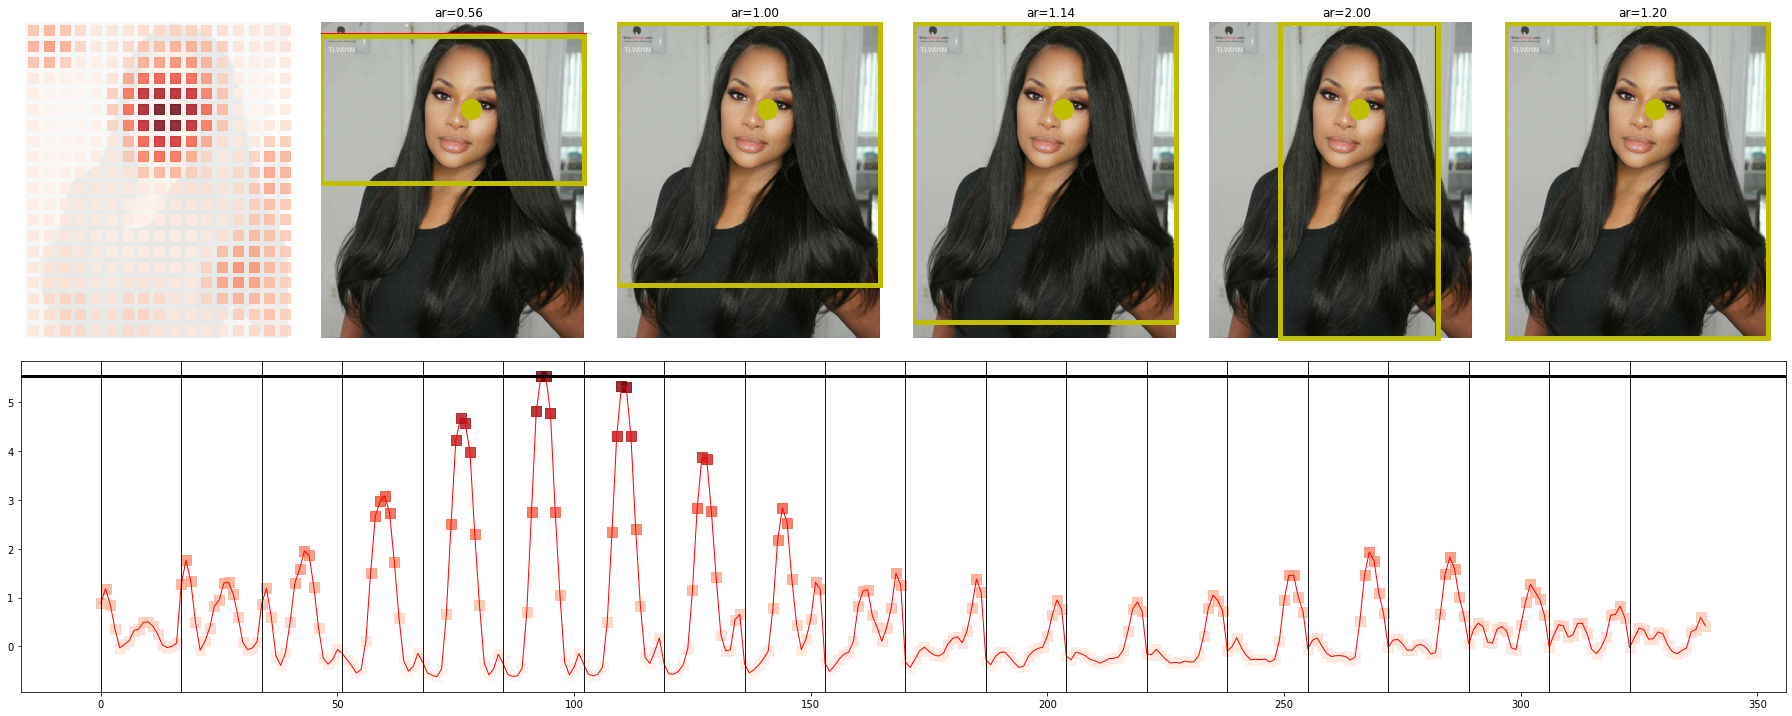

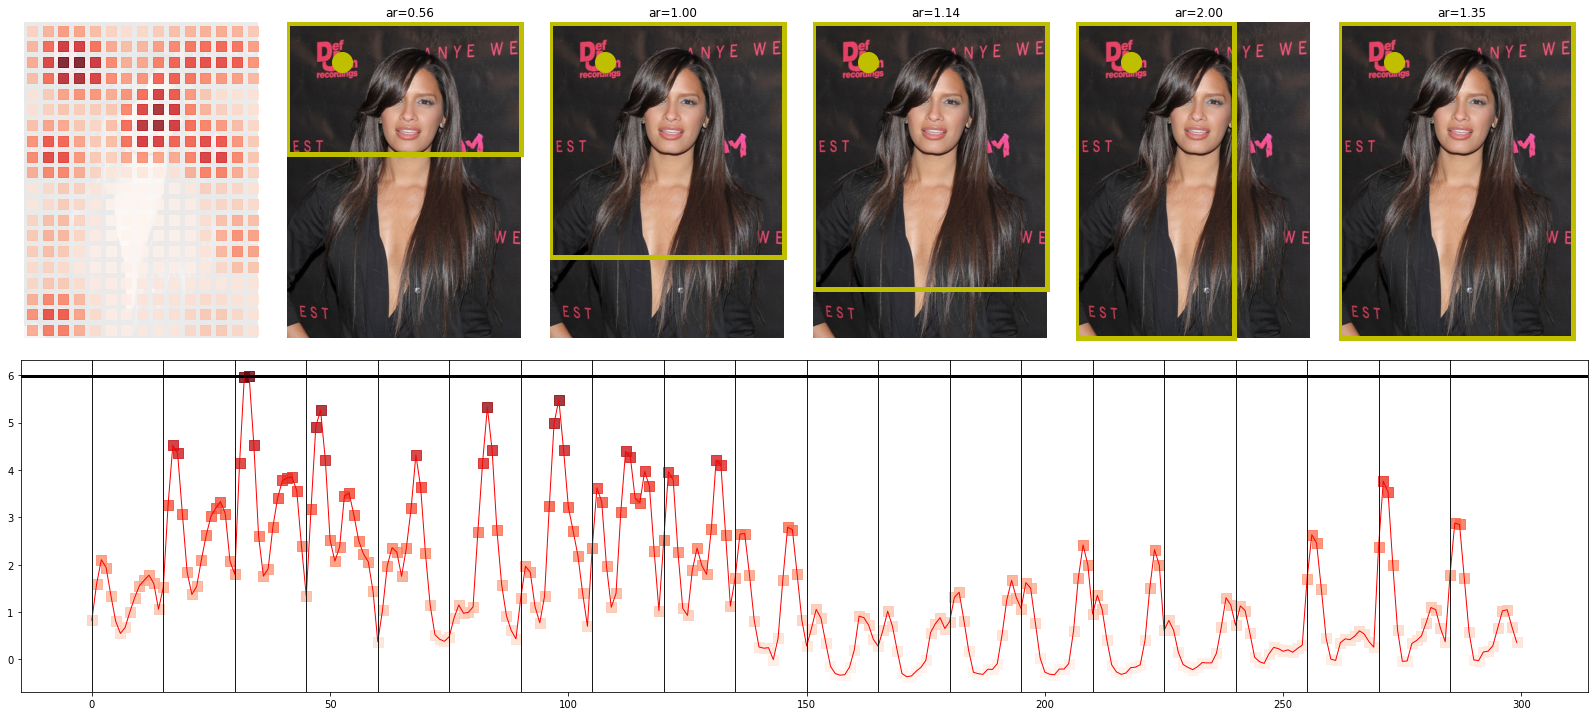

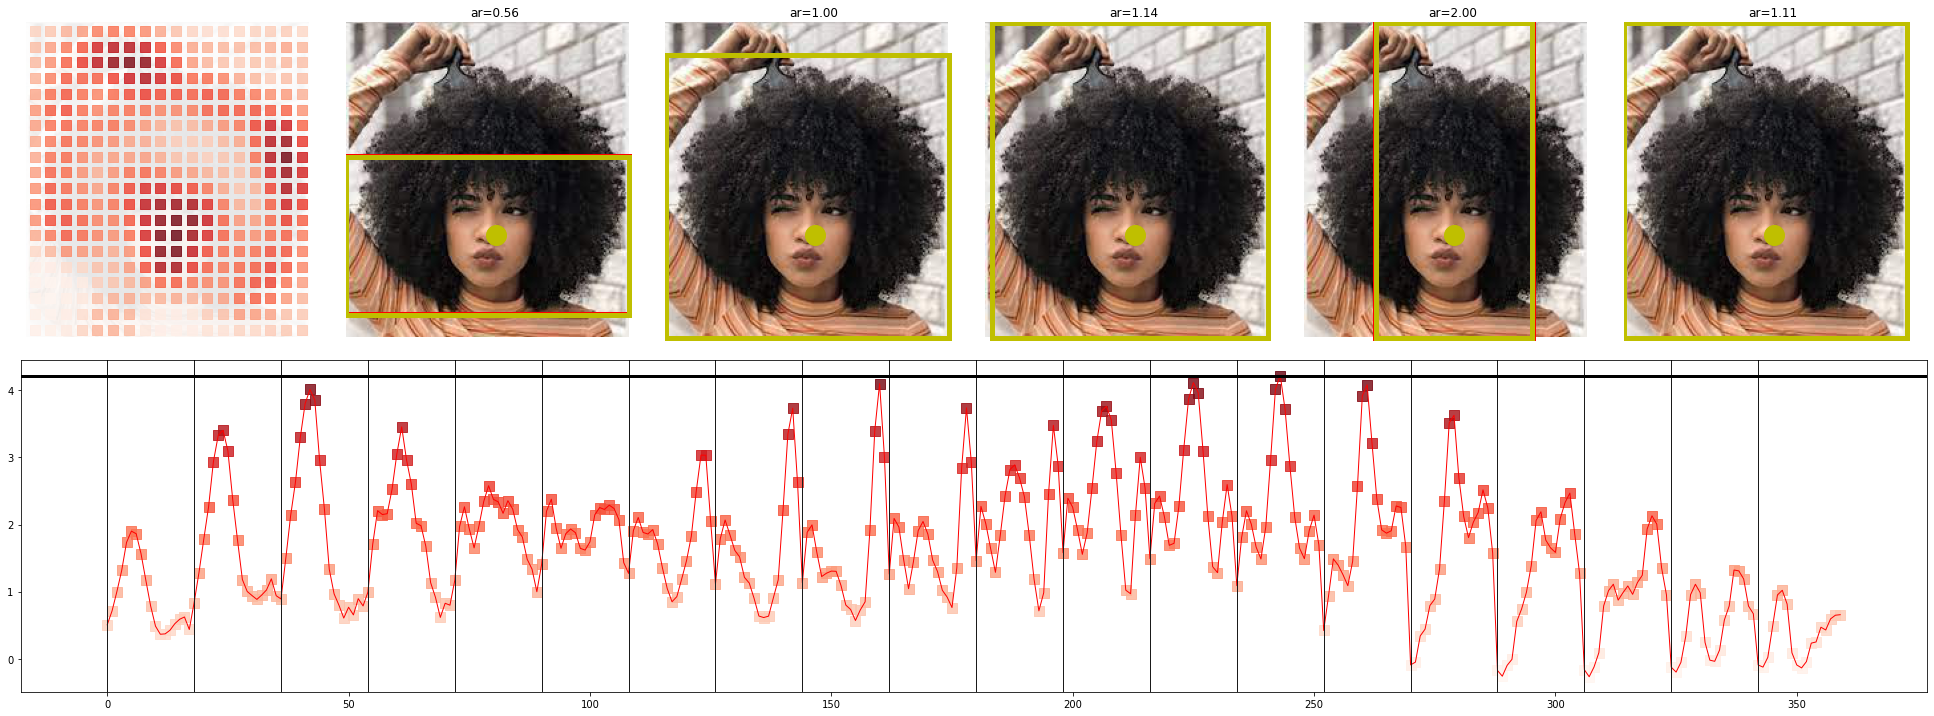

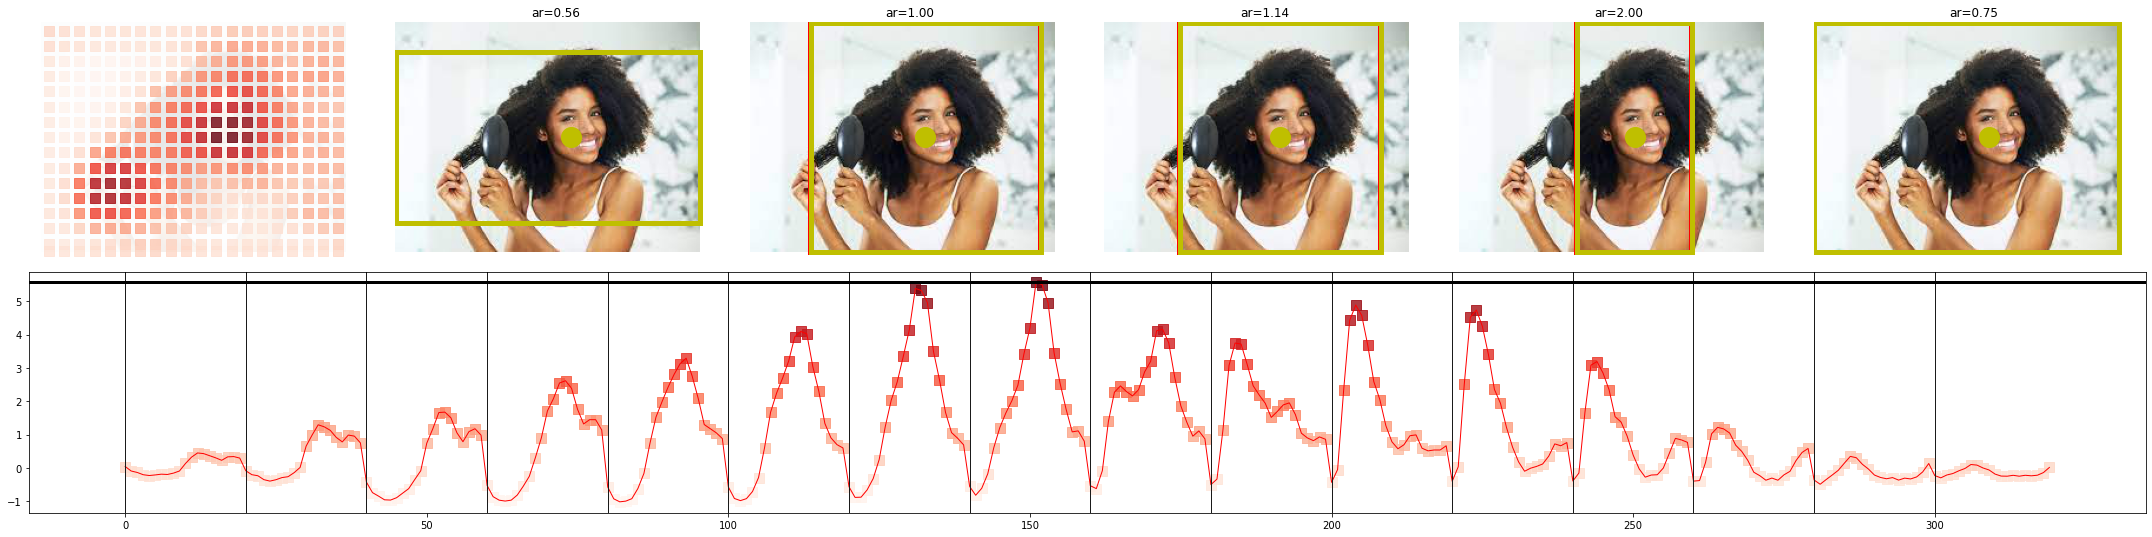

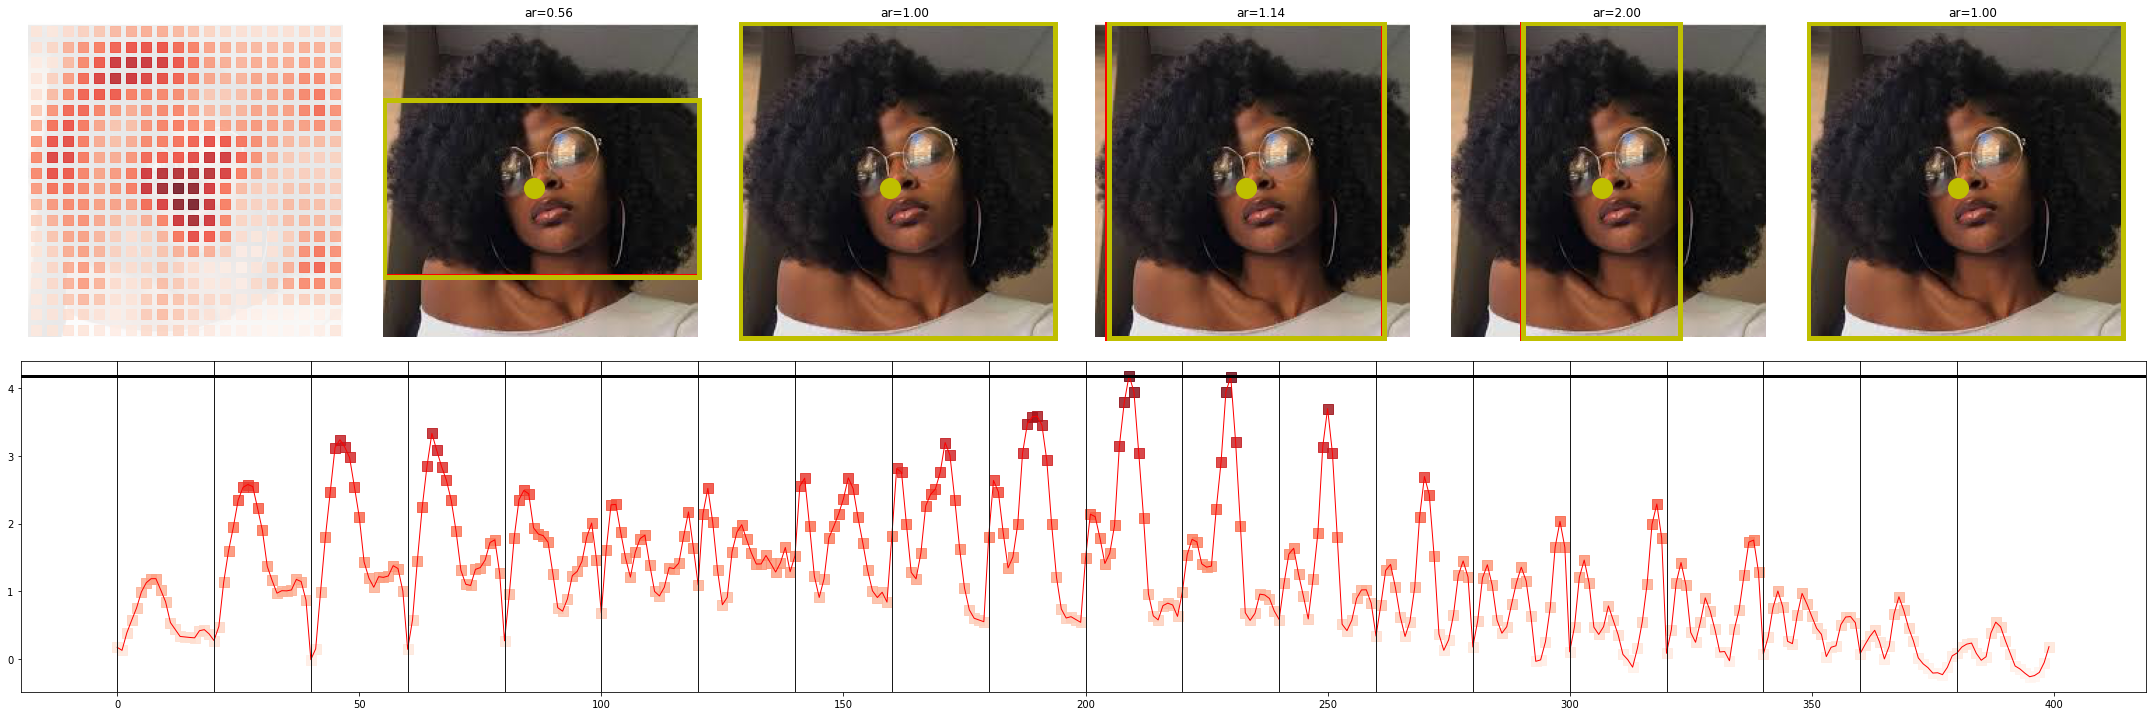

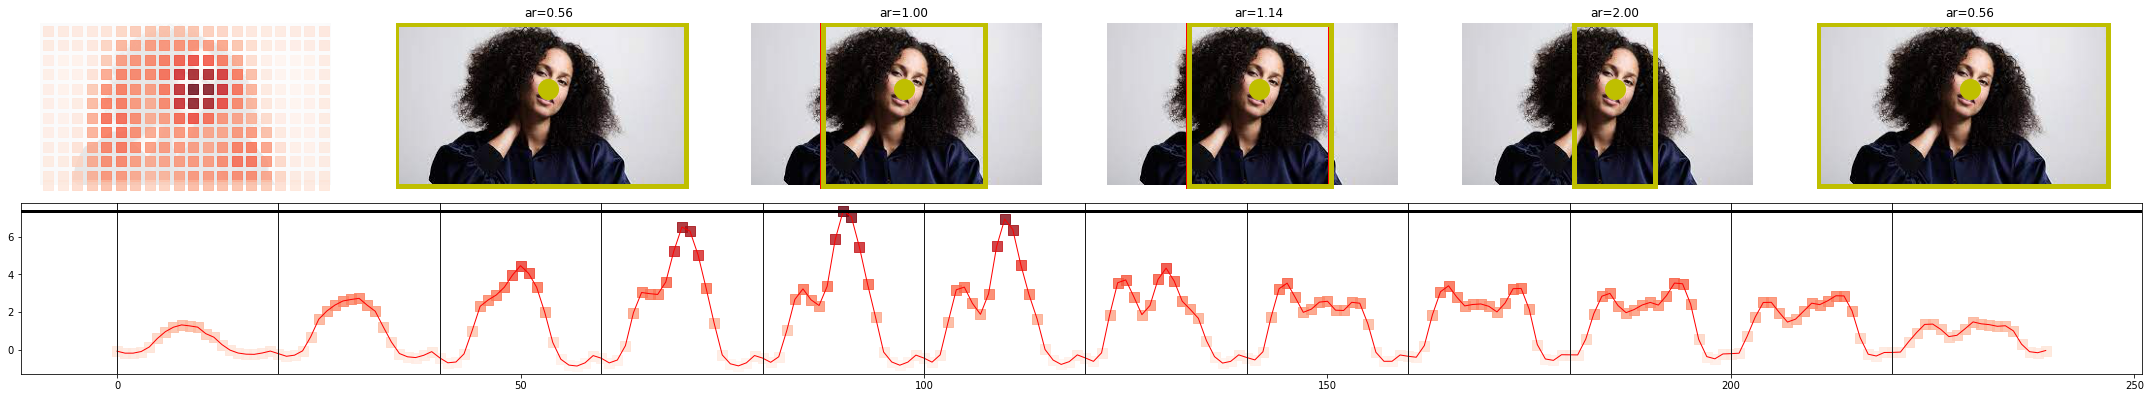

In [ ]:
for img_path in data_dir.glob("*.jpg"):
    print(img_path)
    model.plot_img_crops(img_path)

None 1080 1296
None 500 674
None 213 237
None 259 195
None 225 225


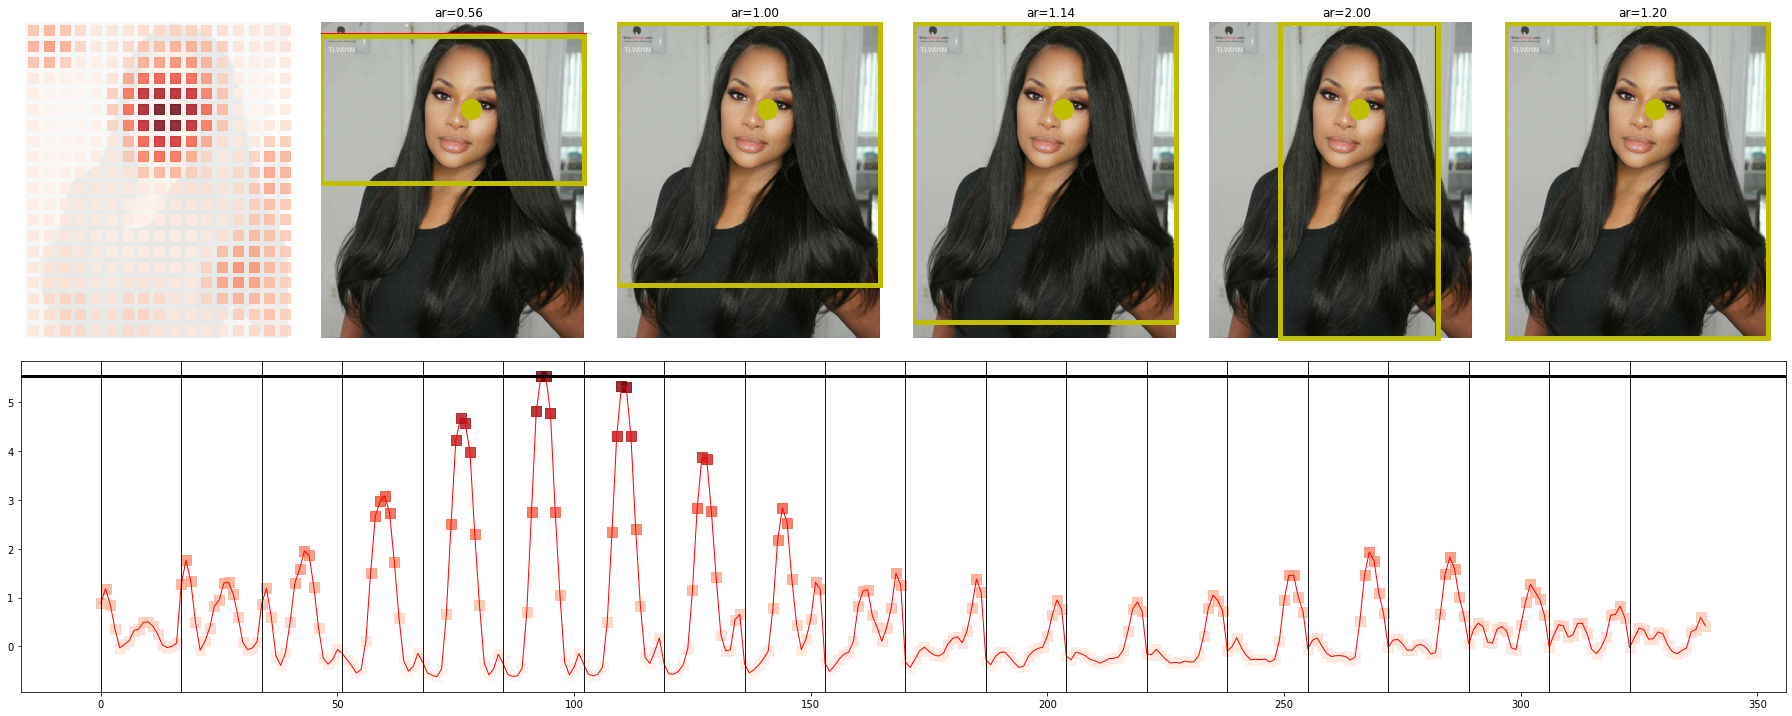

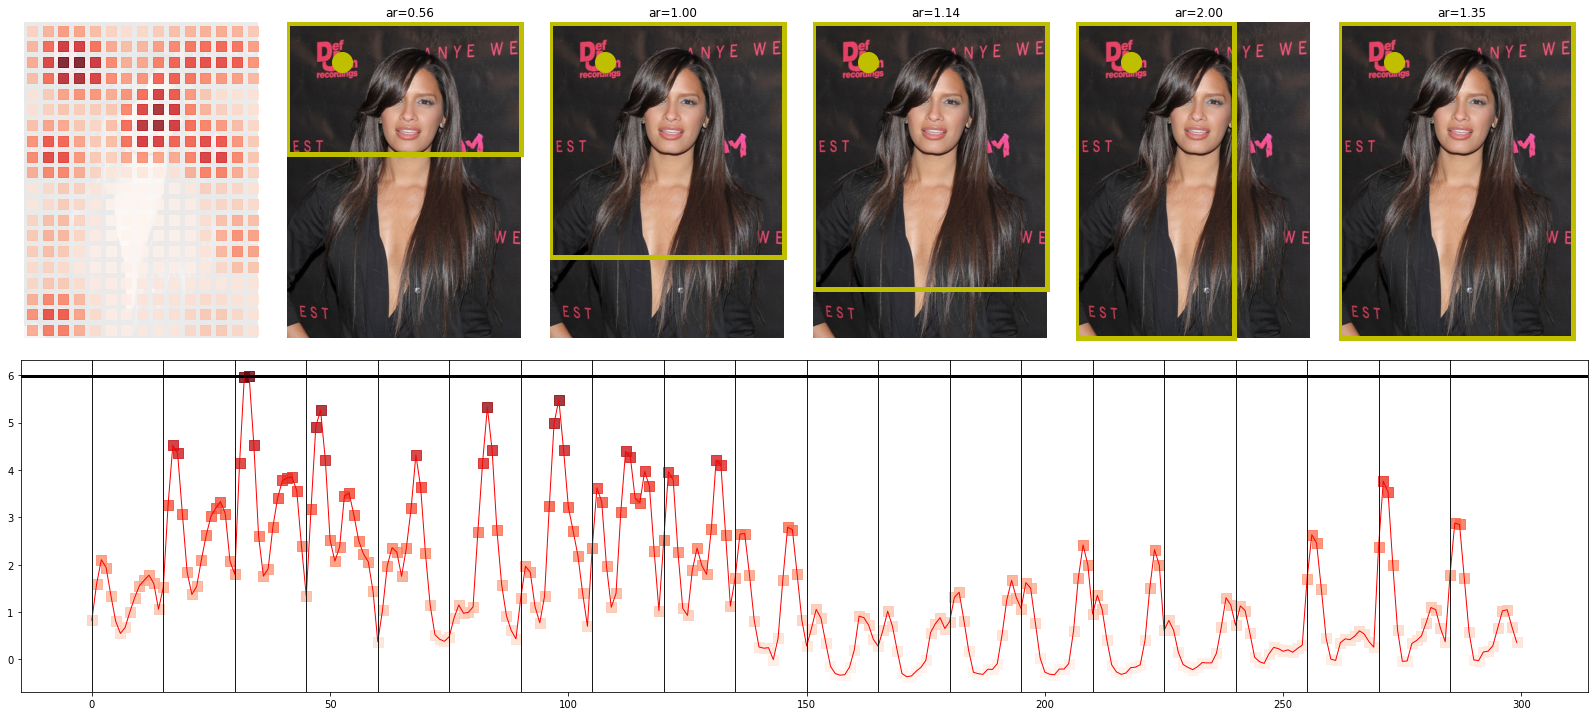

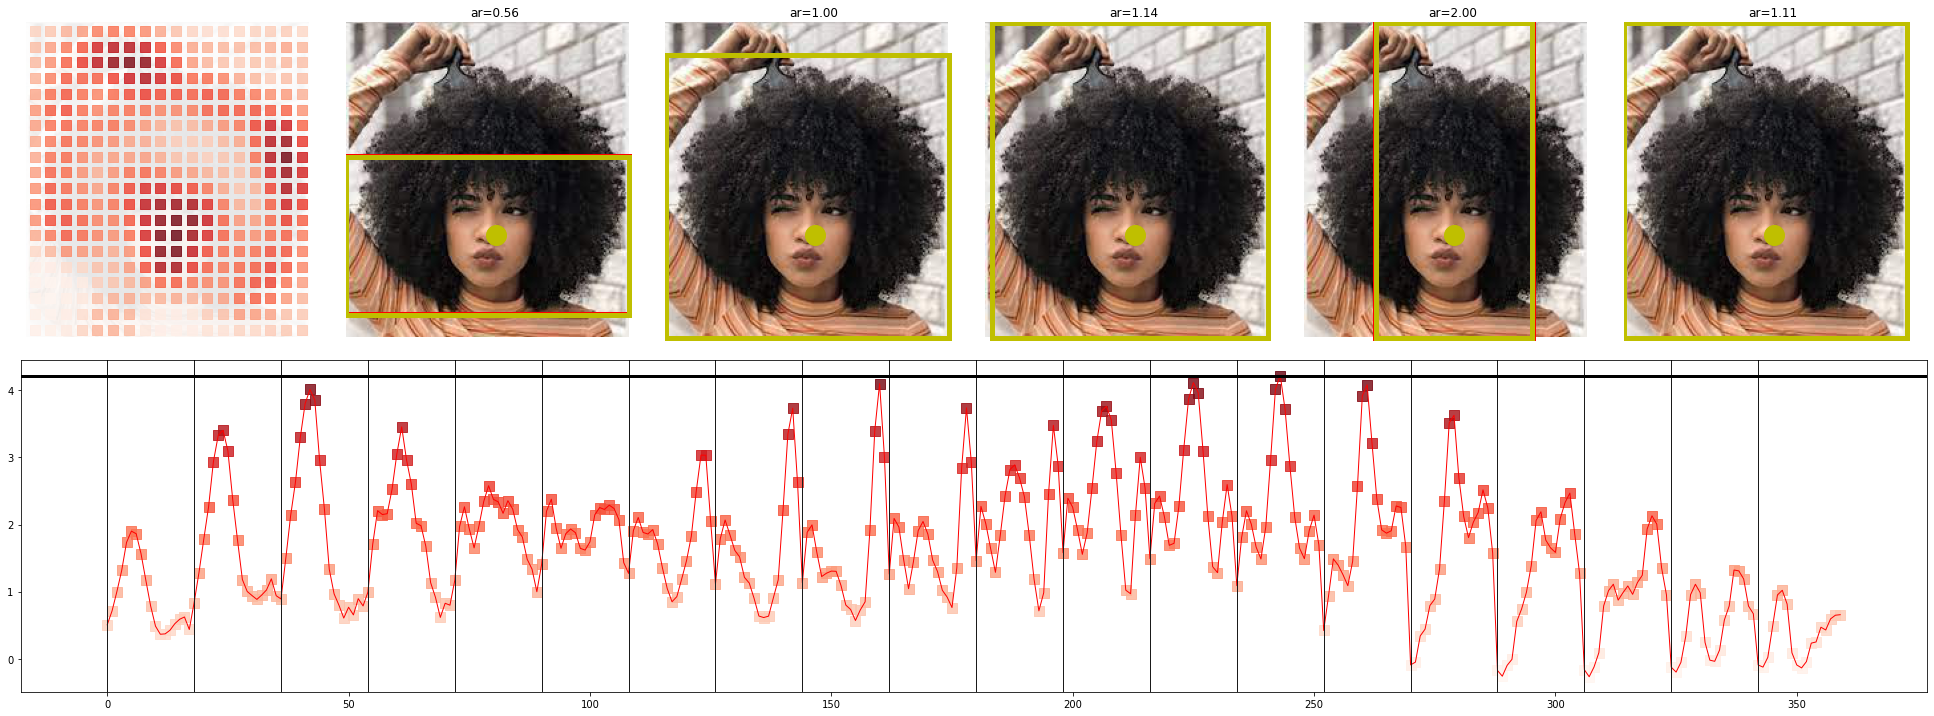

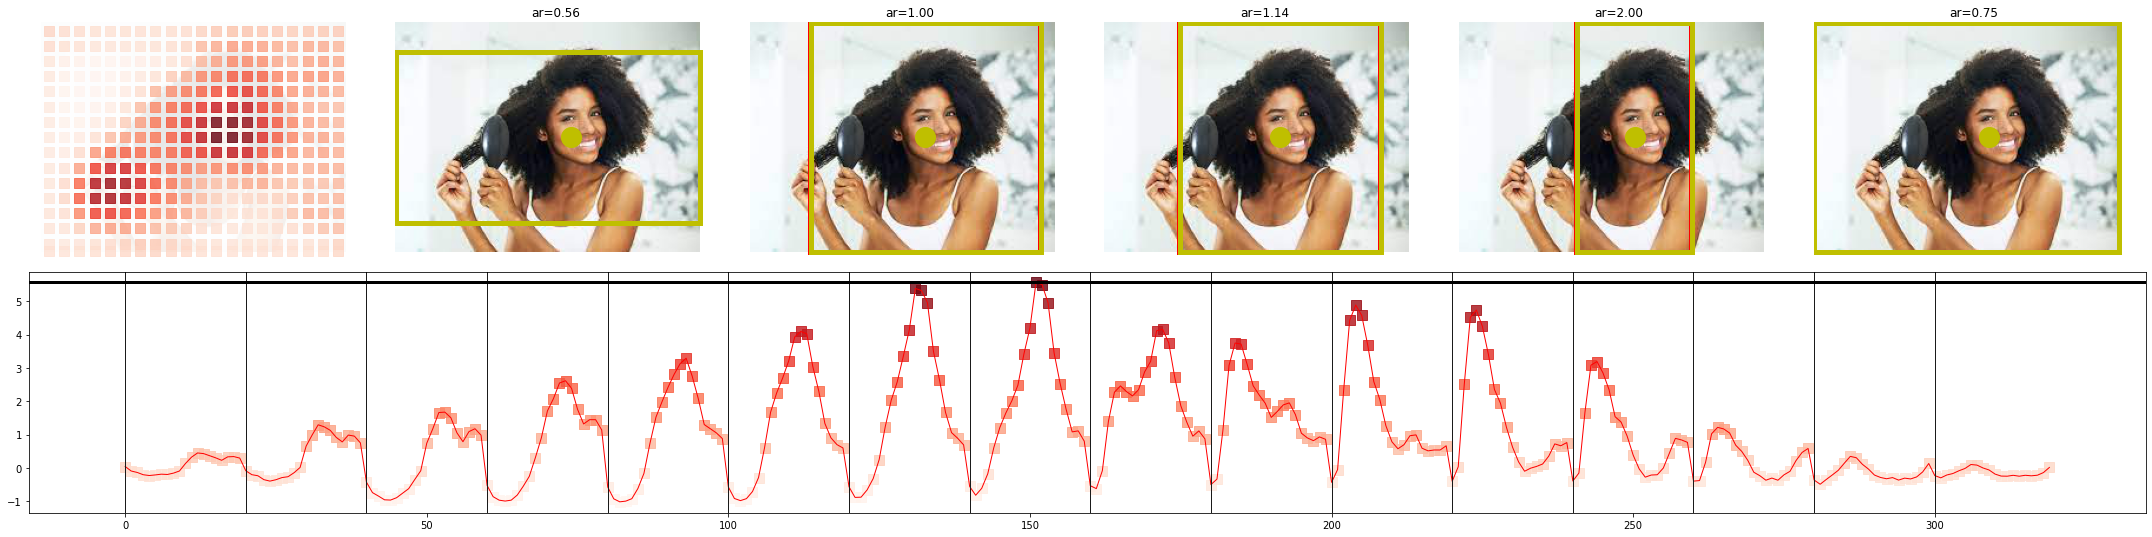

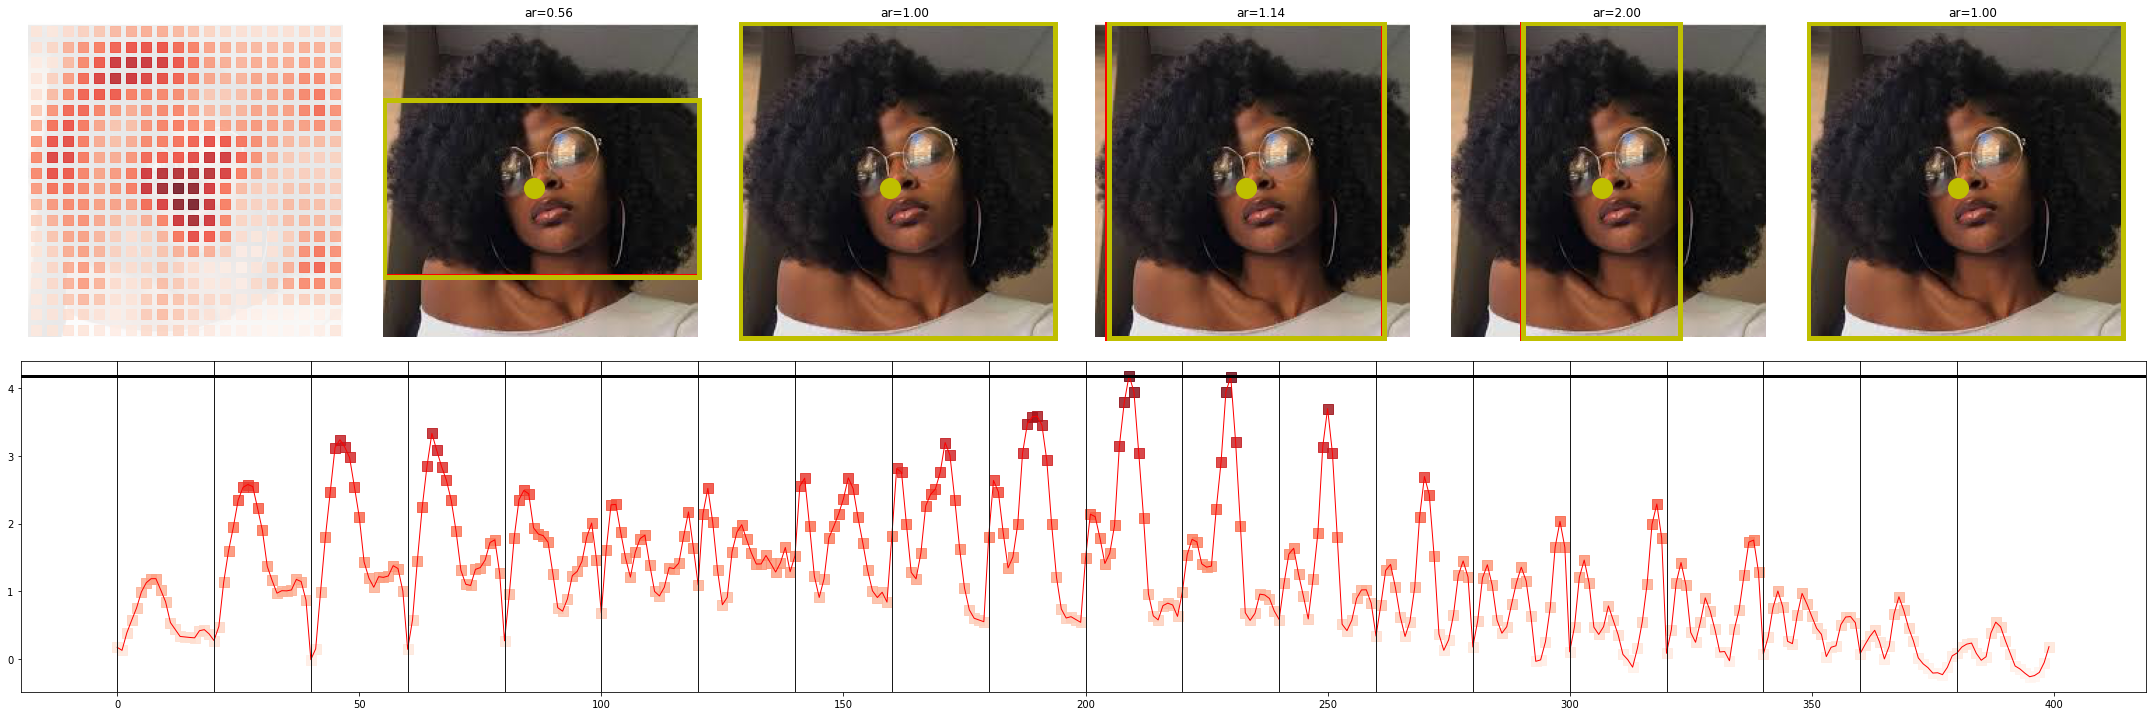

In [ ]:
for img_path in reservoir_sampling(data_dir.glob("./*.jpg"), K=5):
    model.plot_img_crops(img_path)

None 1034 851


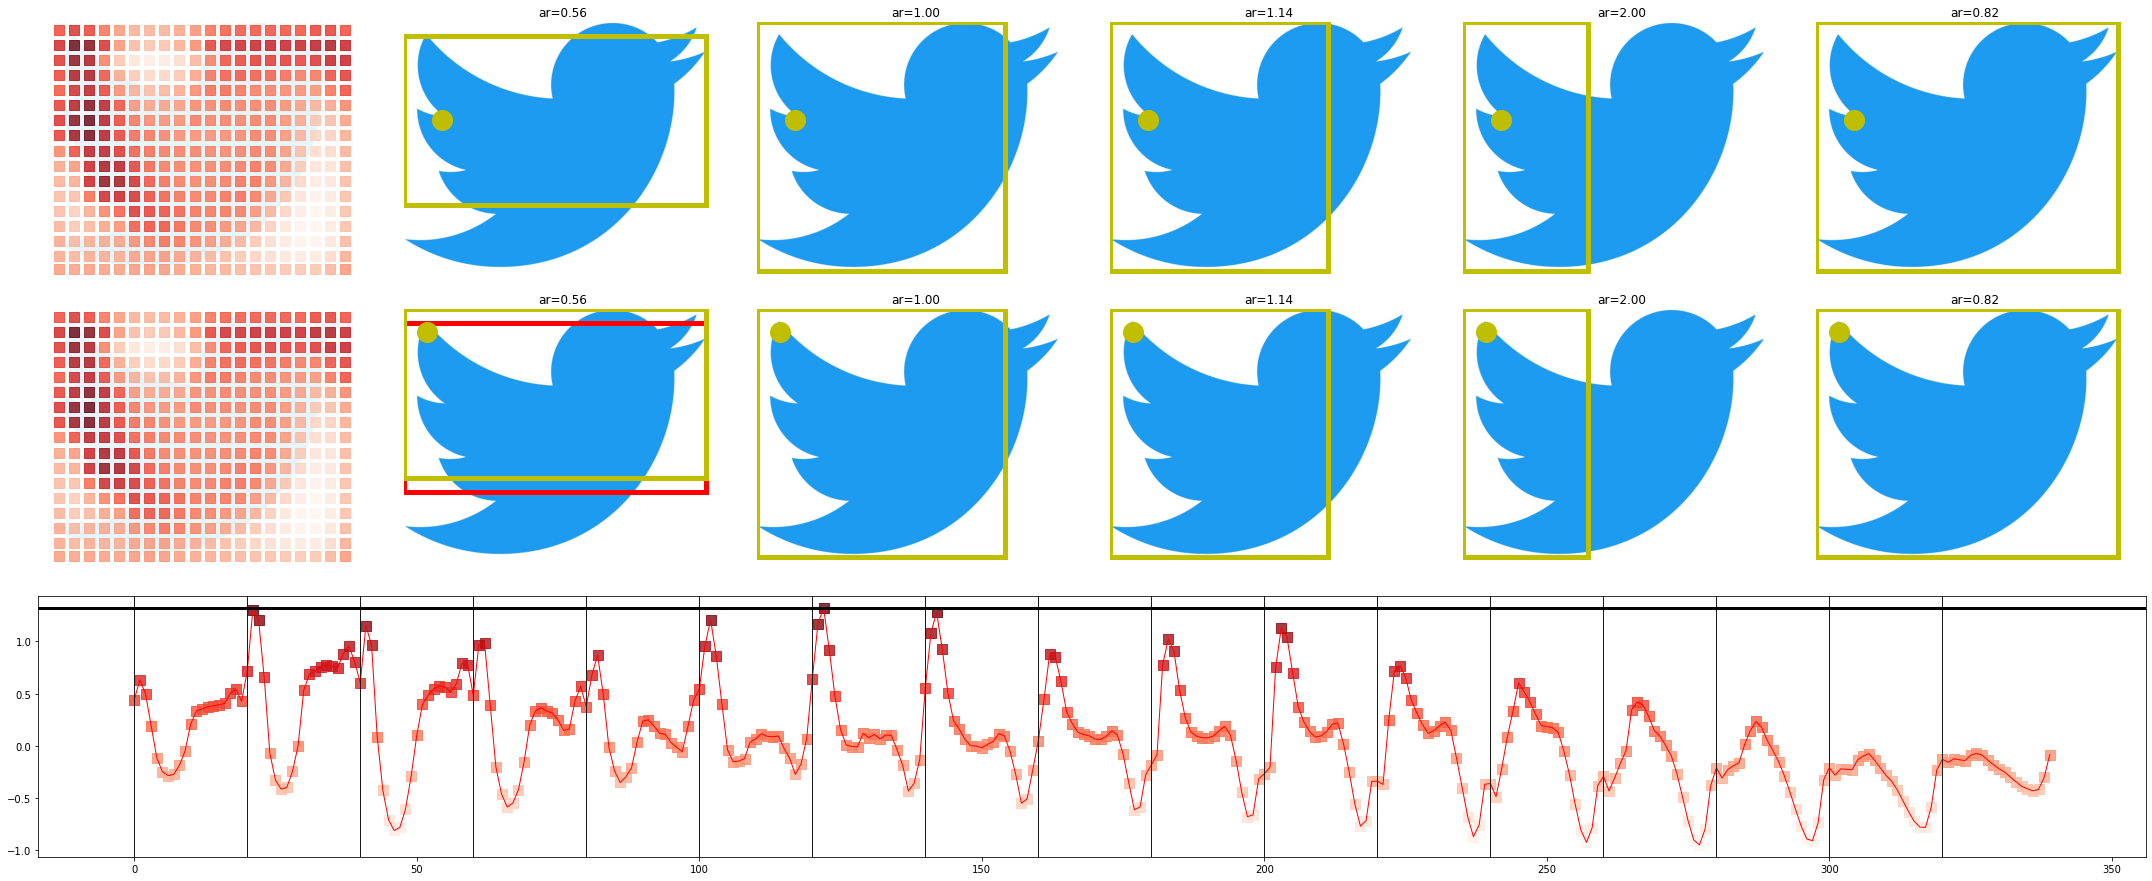

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2)
plt.savefig("dummy.jpg", bbox_inches="tight")

## Sample crops based on saliency scores


* First, we show the top 3 crops based sorted saliency scores (highest first)
* Next, we show the top 3 crops sampled based on saliency scores converted into probs using the following formula:

$$
\begin{equation}
p_i = \frac{exp(s_i)}{Z}\\
Z = \sum_{j=0}^{j=N} exp(s_j)
\end{equation}
$$

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3)
plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3, sample=True)

## Crop an image generated using combination of images

In [ ]:
from PIL import Image

from image_manipulation import join_images

In [ ]:
images = [Image.open(x) for x in data_dir.glob("./*.jpeg")]
img = join_images(images, col_wrap=2, img_size=(128, -1))

In [ ]:
img

In [ ]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy.jpeg")),
]
img = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
model.plot_img_crops_using_img(img, topK=5)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

In [ ]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy.jpeg")),
]
img = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
model.plot_img_crops_using_img(img, topK=1)

In [ ]:
img

In [ ]:
img.save("dummy_dummy_stiched.jpeg", "JPEG")

In [ ]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2, aspectRatios=[0.56])
plt.savefig("dummy.jpeg", bbox_inches="tight")

In [ ]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1, add_saliency_line=False, col_wrap=3)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")